# Loading MNIST
Using the fastai datasets module.

In [1]:
#--export--#
from functools import partial
import gzip
import pickle

from fastai import datasets
from torch import tensor


def loadMNIST():
    MNIST_URL='http://deeplearning.net/data/mnist/mnist.pkl'
    path = datasets.download_data(MNIST_URL, ext='.gz')

    with gzip.open(path, 'rb') as file:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(file,
                                                        encoding='latin-1')

    return map(partial(tensor, , (x_train, y_train, x_valid, y_valid))

In [2]:
from exports.e_01_testing import test_equal

x_train, y_train, x_valid, y_valid = loadMNIST()

n_samples, n_output_channels = x_train.shape

test_equal(n_samples, y_train.shape[0])
test_equal(n_output_channels, 28*28)
test_equal(y_train.min(), 0)
test_equal(y_train.max(), 9)

Argument `50000` IS equal to `50000`.
Argument `784` IS equal to `784`.
Argument `0` IS equal to `0`.
Argument `9` IS equal to `9`.


In [3]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

torch.FloatTensor


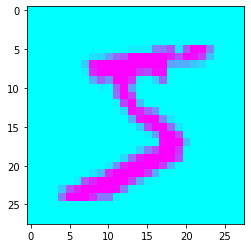

In [4]:
matplotlib.rcParams['image.cmap'] = 'cool'
img = x_train[0]
print(img.view(28, 28).type())
plt.imshow(img.view((28, 28)))

# `test_near_torch`

In [8]:
import torch
from exports.e_01_testing import test_near_torch

m1 = x_valid[:5]
m2 = weights = torch.randn(784, 10)
print(m1.shape, m2.shape)

%timeit -n 100 torch.einsum('ik,kj->ij', m1, m2)
%timeit -n 100 m1@m2

t1, t2 = torch.einsum('ik,kj->ij', m1, m2), m1@m2

test_near_torch(t1, t2)

torch.Size([5, 784]) torch.Size([784, 10])
43.8 µs ± 6.36 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.55 µs ± 644 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
Arguments ARE near.


In [5]:
!python utils/export_notebook.py 02_MNISTLoader.ipynb

Notebook 02_MNISTLoader.ipynb has been converted to module ./exports/e_02_MNISTLoader.py!
